# Process recount2 data
This notebook does the following:

1. Selects template experiment
2. Downloads subset of recount2 data, including the template experiment (subset of random experiments + 1 template experiment)
3. Train VAE on subset of recount2 data

In [1]:
%load_ext autoreload
%load_ext rpy2.ipython
%autoreload 2

import os
import sys
import pandas as pd
import numpy as np
import rpy2
import seaborn as sns
from sklearn import preprocessing
import pickle

from ponyo import utils, train_vae_modules
from generic_expression_patterns_modules import process, calc

np.random.seed(123)

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
Using TensorFlow backend.


In [2]:
# Read in config variables
base_dir = os.path.abspath(os.path.join(os.getcwd(),"../"))

config_file = os.path.abspath(os.path.join(base_dir,
                                           "config_human.tsv"))
params = utils.read_config(config_file)

### Select template experiment

We manually selected bioproject [SRP012656](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE37764), which contains primary non-small cell lung adenocarcinoma tumors and adjacent normal tissues of 6 never-smoker Korean female patients with 2 replicates each.

In [3]:
# Load params
local_dir = params["local_dir"]
dataset_name = params['dataset_name']
NN_architecture = params['NN_architecture']
project_id = params['project_id']
num_recount2_experiments = params['num_recount2_experiments']

### Download subset of recount2 to use as a compendium
The compendium will be composed of random experiments + the selected template experiment

In [4]:
%%R
# Select 59
# Select a
# Run one time
#if (!requireNamespace("BiocManager", quietly = TRUE))
#    install.packages("BiocManager")
#BiocManager::install("derfinder")
#BiocManager::install("recount")

NULL


In [5]:
%%R
library('recount')

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Loading required package: SummarizedExperiment

  warnings.warn(x, RRuntimeWarning)
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Loading required package: GenomicRanges

  warnings.warn(x, RRuntimeWarning)
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Loading required package: stats4

  warnings.warn(x, RRuntimeWarning)
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Loading required package: BiocGenerics

  warnings.warn(x, RRuntimeWarning)
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Loading required package: parallel

  warnings.warn(x

In [6]:
%%R -i project_id -i num_recount2_experiments -i local_dir -i base_dir

source('../generic_expression_patterns_modules/download_recount2_data.R')

get_recount2_compendium(project_id, num_recount2_experiments, local_dir, base_dir)

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 2020-07-06 15:23:02 downloading the metadata to /tmp/RtmpFps4Ha/metadata_clean_sra.Rdata

  warnings.warn(x, RRuntimeWarning)
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: trying URL 'https://github.com/leekgroup/recount-website/blob/master/metadata/metadata_clean_sra.Rdata?raw=true'

  warnings.warn(x, RRuntimeWarning)
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Content type 'application/octet-stream'
  warnings.warn(x, RRuntimeWarning)
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  length 2531337 bytes (2.4 MB)

  warnings.warn(x, RRuntimeWarning)
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 2020-07-06 15:23:21 downloading file rse_gene.Rdata to SRP044956

  warnings.warn(x, RRuntimeWarning)
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: trying URL 'http://duffel.rail.bio/recount/v2/SRP044956/rse_gene.Rdata'

  warnings.warn(x, RRuntimeWarning)
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  length 2454112 bytes (2.3 MB)

  warnings.warn(x, RRuntimeWarning)
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: downloaded 2.3 MB


  warnings.warn(x, RRuntimeWarning)
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 2020-07-06 15:23:22 downl

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  length 2887183 bytes (2.8 MB)

  warnings.warn(x, RRuntimeWarning)
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: downloaded 2.8 MB


  warnings.warn(x, RRuntimeWarning)
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 2020-07-06 15:23:34 downloading file rse_gene.Rdata to SRP034953

  warnings.warn(x, RRuntimeWarning)
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: trying URL 'http://duffel.rail.bio/recount/v2/SRP034953/rse_gene.Rdata'

  warnings.warn(x, RRuntimeWarning)
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  length 2185007 bytes (2.

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 2020-07-06 15:23:46 downloading file rse_gene.Rdata to SRP002278

  warnings.warn(x, RRuntimeWarning)
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: trying URL 'http://duffel.rail.bio/recount/v2/SRP002278/rse_gene.Rdata'

  warnings.warn(x, RRuntimeWarning)
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  length 1682209 bytes (1.6 MB)

  warnings.warn(x, RRuntimeWarning)
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 2020-07-06 15:23:47 downloading file rse_gene.Rdata to SRP034547

  warnings.warn(x, RRuntimeWarning)
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:1

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 2020-07-06 15:24:00 downloading file rse_gene.Rdata to SRP061255

  warnings.warn(x, RRuntimeWarning)
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: trying URL 'http://duffel.rail.bio/recount/v2/SRP061255/rse_gene.Rdata'

  warnings.warn(x, RRuntimeWarning)
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  length 1695970 bytes (1.6 MB)

  warnings.warn(x, RRuntimeWarning)
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 2020-07-06 15:24:01 downloading file rse_gene.Rdata to SRP033466

  warnings.warn(x, RRuntimeWarning)
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:1

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  length 2104702 bytes (2.0 MB)

  warnings.warn(x, RRuntimeWarning)
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: downloaded 2.0 MB


  warnings.warn(x, RRuntimeWarning)
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 2020-07-06 15:24:19 downloading file rse_gene.Rdata to ERP011000

  warnings.warn(x, RRuntimeWarning)
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: trying URL 'http://duffel.rail.bio/recount/v2/ERP011000/rse_gene.Rdata'

  warnings.warn(x, RRuntimeWarning)
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  length 2354161 bytes (2.

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 2020-07-06 15:24:34 downloading file rse_gene.Rdata to SRP007881

  warnings.warn(x, RRuntimeWarning)
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: trying URL 'http://duffel.rail.bio/recount/v2/SRP007881/rse_gene.Rdata'

  warnings.warn(x, RRuntimeWarning)
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  length 2831610 bytes (2.7 MB)

  warnings.warn(x, RRuntimeWarning)
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 2020-07-06 15:24:36 downloading file rse_gene.Rdata to SRP007481

  warnings.warn(x, RRuntimeWarning)
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:1

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: downloaded 6.7 MB


  warnings.warn(x, RRuntimeWarning)
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 2020-07-06 15:24:50 downloading file rse_gene.Rdata to SRP026454

  warnings.warn(x, RRuntimeWarning)
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: trying URL 'http://duffel.rail.bio/recount/v2/SRP026454/rse_gene.Rdata'

  warnings.warn(x, RRuntimeWarning)
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  length 2036277 bytes (1.9 MB)

  warnings.warn(x, RRuntimeWarning)
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 2020-07-06 15:24:51 downl

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 2020-07-06 15:25:08 downloading file rse_gene.Rdata to SRP015904

  warnings.warn(x, RRuntimeWarning)
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: trying URL 'http://duffel.rail.bio/recount/v2/SRP015904/rse_gene.Rdata'

  warnings.warn(x, RRuntimeWarning)
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  length 2184522 bytes (2.1 MB)

  warnings.warn(x, RRuntimeWarning)
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 2020-07-06 15:25:09 downloading file rse_gene.Rdata to DRP001150

  warnings.warn(x, RRuntimeWarning)
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:1

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 2020-07-06 15:25:27 downloading file rse_gene.Rdata to SRP035665

  warnings.warn(x, RRuntimeWarning)
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: trying URL 'http://duffel.rail.bio/recount/v2/SRP035665/rse_gene.Rdata'

  warnings.warn(x, RRuntimeWarning)
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  length 1888946 bytes (1.8 MB)

  warnings.warn(x, RRuntimeWarning)
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 2020-07-06 15:25:28 downloading file rse_gene.Rdata to SRP007819

  warnings.warn(x, RRuntimeWarning)
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:1

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 2020-07-06 15:25:44 downloading file rse_gene.Rdata to SRP014842

  warnings.warn(x, RRuntimeWarning)
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: trying URL 'http://duffel.rail.bio/recount/v2/SRP014842/rse_gene.Rdata'

  warnings.warn(x, RRuntimeWarning)
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  length 3113924 bytes (3.0 MB)

  warnings.warn(x, RRuntimeWarning)
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 2020-07-06 15:25:46 downloading file rse_gene.Rdata to SRP058714

  warnings.warn(x, RRuntimeWarning)
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:1

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 2020-07-06 15:26:06 downloading file rse_gene.Rdata to SRP048993

  warnings.warn(x, RRuntimeWarning)
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: trying URL 'http://duffel.rail.bio/recount/v2/SRP048993/rse_gene.Rdata'

  warnings.warn(x, RRuntimeWarning)
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  length 3390346 bytes (3.2 MB)

  warnings.warn(x, RRuntimeWarning)
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 2020-07-06 15:26:07 downloading file rse_gene.Rdata to SRP004637

  warnings.warn(x, RRuntimeWarning)
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:1

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 2020-07-06 15:26:27 downloading file rse_gene.Rdata to SRP033098

  warnings.warn(x, RRuntimeWarning)
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: trying URL 'http://duffel.rail.bio/recount/v2/SRP033098/rse_gene.Rdata'

  warnings.warn(x, RRuntimeWarning)
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  length 2688007 bytes (2.6 MB)

  warnings.warn(x, RRuntimeWarning)
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 2020-07-06 15:26:28 downloading file rse_gene.Rdata to SRP005242

  warnings.warn(x, RRuntimeWarning)
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:1

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 2020-07-06 15:26:48 downloading file rse_gene.Rdata to ERP010500

  warnings.warn(x, RRuntimeWarning)
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: trying URL 'http://duffel.rail.bio/recount/v2/ERP010500/rse_gene.Rdata'

  warnings.warn(x, RRuntimeWarning)
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  length 1992945 bytes (1.9 MB)

  warnings.warn(x, RRuntimeWarning)
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 2020-07-06 15:26:50 downloading file rse_gene.Rdata to SRP049484

  warnings.warn(x, RRuntimeWarning)
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:1

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 2020-07-06 15:27:11 downloading file rse_gene.Rdata to SRP060598

  warnings.warn(x, RRuntimeWarning)
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: trying URL 'http://duffel.rail.bio/recount/v2/SRP060598/rse_gene.Rdata'

  warnings.warn(x, RRuntimeWarning)
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  length 2223161 bytes (2.1 MB)

  warnings.warn(x, RRuntimeWarning)
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 2020-07-06 15:27:12 downloading file rse_gene.Rdata to SRP048562

  warnings.warn(x, RRuntimeWarning)
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:1

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 2020-07-06 15:27:30 downloading file rse_gene.Rdata to SRP058375

  warnings.warn(x, RRuntimeWarning)
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: trying URL 'http://duffel.rail.bio/recount/v2/SRP058375/rse_gene.Rdata'

  warnings.warn(x, RRuntimeWarning)
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  length 2639968 bytes (2.5 MB)

  warnings.warn(x, RRuntimeWarning)
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 2020-07-06 15:27:32 downloading file rse_gene.Rdata to SRP063838

  warnings.warn(x, RRuntimeWarning)
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:1

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 2020-07-06 15:27:51 downloading file rse_gene.Rdata to SRP014540

  warnings.warn(x, RRuntimeWarning)
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: trying URL 'http://duffel.rail.bio/recount/v2/SRP014540/rse_gene.Rdata'

  warnings.warn(x, RRuntimeWarning)
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  length 1778461 bytes (1.7 MB)

  warnings.warn(x, RRuntimeWarning)
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 2020-07-06 15:27:54 downloading file rse_gene.Rdata to SRP034698

  warnings.warn(x, RRuntimeWarning)
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:1

[1] "SRP012651"
Loading objects:
  rse_gene
[1] "SRP014574"
Loading objects:
  rse_gene
[1] "SRP000542"
Loading objects:
  rse_gene
[1] "SRP016059"
Loading objects:
  rse_gene
[1] "SRP001540"
Loading objects:
  rse_gene
[1] "SRP034626"
Loading objects:
  rse_gene
[1] "SRP062873"
Loading objects:
  rse_gene
[1] "SRP041956"
Loading objects:
  rse_gene
[1] "SRP046254"
Loading objects:
  rse_gene
[1] "SRP044956"
Loading objects:
  rse_gene
[1] "SRP045269"
Loading objects:
  rse_gene
[1] "SRP039357"
Loading objects:
  rse_gene
[1] "SRP049238"
Loading objects:
  rse_gene
[1] "SRP021130"
Loading objects:
  rse_gene
[1] "SRP018571"
Loading objects:
  rse_gene
[1] "SRP056201"
Loading objects:
  rse_gene
[1] "SRP060708"
Loading objects:
  rse_gene
[1] "SRP023262"
Loading objects:
  rse_gene
[1] "SRP037775"
Loading objects:
  rse_gene
[1] "SRP041531"
Loading objects:
  rse_gene
[1] "SRP034953"
Loading objects:
  rse_gene
[1] "SRP010041"
Loading objects:
  rse_gene
[1] "SRP038143"
Loading objects:

### Download expression data for selected project id

In [7]:
%%R -i project_id -i local_dir

source('../generic_expression_patterns_modules/download_recount2_data.R')

get_recount2_template_experiment(project_id, local_dir)

Loading objects:
  rse_gene


### Subset genes
For our downstream analysis we will be comparing our set of differentially expression genes against the set found in [Crow et. al. publication](https://www.pnas.org/content/pnas/116/13/6491.full.pdf), therefore we will limit our genes to include only those genes shared between our starting set of genes and those in publication. 

In [8]:
# Get generic genes identified by Crow et. al.
DE_prior_file = "https://raw.githubusercontent.com/maggiecrow/DEprior/master/DE_Prior.txt"

DE_prior = pd.read_csv(DE_prior_file,
                       header=0,
                       sep="\t")

DE_prior.head()

,Gene_Order,Gene_EntrezID,N_HitLists,DE_Prior_Rank,Gene_Name
0,1,7503,79,1.000000,XIST
1,2,8653,64,0.999948,DDX3Y
2,3,9086,62,0.999870,EIF1AY
3,4,8284,52,0.999870,KDM5D
4,5,8287,46,0.999791,USP9Y


In [9]:
# Get list of published generic genes
published_generic_genes = list(DE_prior['Gene_Name'])

In [10]:
# Get list of our genes
# Load real template experiment
template_data_file = params['template_data_file']

# Read template data
template_data = pd.read_csv(
    template_data_file,
    header=0,
    sep='\t',
    index_col=0)

our_gene_ids = list(template_data.columns)

In [11]:
# File mapping ensembl ids to hgnc symbols
gene_id_file = os.path.join(
    local_dir,
    "ensembl_hgnc_mapping.tsv")

In [12]:
%%R
suppressWarnings(library("biomaRt"))

In [13]:
%%R -i template_data_file -i gene_id_file

# Get mapping between ensembl gene ids (ours) to HGNC gene symbols (published)

source('../generic_expression_patterns_modules/process_names.R')

if (file.exists(gene_id_file) == FALSE){
    gene_id_mapping <- get_ensembl_symbol_mapping(template_data_file, gene_id_file)
}

In [14]:
# Read gene id mapping
gene_id_mapping = pd.read_csv(
        gene_id_file,
        header=0,
        sep='\t',
        index_col=0)

print(gene_id_mapping.shape)
gene_id_mapping.head()

(57210, 2)


,ensembl_gene_id,hgnc_symbol
1,ENSG00000002330,BAD
2,ENSG00000003137,CYP26B1
3,ENSG00000003249,DBNDD1
4,ENSG00000004799,PDK4
5,ENSG00000006062,MAP3K14


In [15]:
# Get mapping between ensembl ids with and without version numbers
# Expressiond data uses ensembl gene ids with version number 
ensembl_gene_ids = pd.DataFrame(data={'ensembl_version': our_gene_ids,
                                      'ensembl_parsed': [gene_id.split('.')[0] for gene_id in our_gene_ids]})

print(ensembl_gene_ids.shape)
ensembl_gene_ids.head()

(58037, 2)


,ensembl_version,ensembl_parsed
0,ENSG00000000003.14,ENSG00000000003
1,ENSG00000000005.5,ENSG00000000005
2,ENSG00000000419.12,ENSG00000000419
3,ENSG00000000457.13,ENSG00000000457
4,ENSG00000000460.16,ENSG00000000460


In [16]:
# Map ensembl ids with version number to gene_id_mapping_df
gene_id_mapping = pd.merge(gene_id_mapping, 
                           ensembl_gene_ids, 
                           left_on='ensembl_gene_id',
                           right_on='ensembl_parsed', 
                           how='outer')

print(gene_id_mapping.shape)
gene_id_mapping.set_index('ensembl_version', inplace=True)
gene_id_mapping.head()

(58129, 4)


,ensembl_gene_id,hgnc_symbol,ensembl_parsed
ensembl_version,,,
ENSG00000002330.13,ENSG00000002330,BAD,ENSG00000002330
ENSG00000003137.8,ENSG00000003137,CYP26B1,ENSG00000003137
ENSG00000003249.13,ENSG00000003249,DBNDD1,ENSG00000003249
ENSG00000004799.7,ENSG00000004799,PDK4,ENSG00000004799
ENSG00000006062.13,ENSG00000006062,MAP3K14,ENSG00000006062


Since this experiment contains both RNA-seq and smRNA-seq samples which are in different ranges so we will drop smRNA samples so that samples are within the same range. The analysis identifying these two subsets of samples can be found in this [notebook](0_explore_input_data.ipynb)

In [17]:
# Replace ensembl ids with gene symbols
template_data = process.replace_ensembl_ids(template_data,
                                            gene_id_mapping)

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [18]:
template_data.head()

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,MIR6830,MIR548AH,MYOCOS,MIR522,MIR6715B,MIR3116-2,MIR3202-2,HSFX3,VINAC1P,MIR4481
SRR493937,3.800154,0.018190,9.128459,1.585803,0.713952,84.990542,19.943002,12.065586,2.498822,7.713002,...,0.000000,0.0,0.135649,0.0,0.0,0.00000,0.000000,0.588513,0.0,0.000000
SRR493938,3.798473,0.000000,9.157669,1.456017,0.738967,85.788323,19.621252,11.738855,2.435308,7.125808,...,0.005417,0.0,0.127873,0.0,0.0,0.00000,0.000000,0.452511,0.0,0.000000
SRR493939,20.222134,0.000000,15.522072,3.944919,2.512265,8.072948,47.246078,18.866957,2.443230,12.143670,...,0.000000,0.0,0.011112,0.0,0.0,0.00000,0.000000,0.446833,0.0,0.000000
SRR493940,19.988329,0.000000,17.140304,3.977217,2.378849,7.599225,46.594458,18.921190,2.448276,12.048960,...,0.147412,0.0,0.037886,0.0,0.0,0.07756,0.000000,0.462295,0.0,0.168159
SRR493941,3.239231,0.019398,9.069316,2.181582,1.008155,17.675885,19.371137,11.759756,1.970725,6.740705,...,0.002860,0.0,0.156220,0.0,0.0,0.00000,0.070955,0.739403,0.0,0.000000


In [19]:
# Get intersection of gene lists
our_gene_ids_hgnc = template_data.columns
shared_genes_hgnc = list(set(our_gene_ids_hgnc).intersection(published_generic_genes))
print(len(shared_genes_hgnc))

17785


In [20]:
# Save shared genes
shared_genes_file = os.path.join(
    local_dir,
    "shared_gene_ids.pickle")

outfile = open(shared_genes_file,'wb')
pickle.dump(shared_genes_hgnc,outfile)
outfile.close()

In [21]:
# Drop smRNA samples so that samples are within the same range
smRNA_samples = ["SRR493961",
                 "SRR493962",
                 "SRR493963",
                 "SRR493964",
                 "SRR493965",
                 "SRR493966",
                 "SRR493967",
                 "SRR493968",
                 "SRR493969",
                 "SRR493970",
                 "SRR493971",
                 "SRR493972"]

In [22]:
# Drop samples
template_data = template_data.drop(smRNA_samples)

In [23]:
# Drop genes
template_data = template_data[shared_genes_hgnc]

print(template_data.shape)
template_data.head()

(24, 17788)


,DCTN5,GATAD1,TET3,DPY19L3,TRIM32,MBNL2,BBS7,C6orf118,ANGPT4,NFIL3,...,SDK2,ZP1,CHERP,ZNF766,ABCA17P,CLC,TMEM43,LINC00923,KRT4,BLACAT1
SRR493937,3.630082,4.300634,3.703941,1.994345,2.832506,11.449590,1.716827,2.686279,0.246677,42.000469,...,1.454719,0.022337,8.913790,1.180528,0.041558,1.400514,35.007139,0.065553,3.100518,0.224276
SRR493938,3.816683,4.534380,3.834708,2.068523,3.016240,11.496132,1.610371,2.812914,0.232686,43.716510,...,1.434929,0.015877,8.149113,1.259391,0.055976,1.487139,34.882592,0.111778,3.483319,0.238789
SRR493939,6.195900,11.828562,3.571679,8.987380,2.960431,9.554697,1.545828,0.948424,0.103419,7.682061,...,1.303173,0.106799,8.050353,3.181972,0.061126,0.930062,23.404731,0.030870,1.367475,2.024499
SRR493940,6.227605,11.722440,3.666845,8.518513,2.761214,9.500421,1.668735,1.044065,0.112790,7.772808,...,1.403622,0.116819,7.669627,3.295306,0.115003,0.281308,23.374723,0.024859,1.325788,2.054040
SRR493941,4.625165,6.571044,3.227674,2.695345,3.569456,15.497658,1.877207,0.526048,1.153519,14.531663,...,1.359505,0.029750,8.913051,1.543126,0.081247,4.321060,46.676157,0.027990,6.762506,0.118686


In [24]:
print(len(template_data.columns) - len(shared_genes_hgnc))

3


*Note:* There is a difference in the number of `shared_genes_hgnc` and genes in the template experiment because 3 genes have 2 different ensembl gene ids have map to the same hgnc symbol (one forward, one reverse)

In [25]:
# Save 
template_data.to_csv(template_data_file, float_format='%.5f', sep='\t')

### Normalize compendium 

In [26]:
# Load real gene expression data
original_compendium_file = params['compendium_data_file']

In [27]:
# Read data
original_compendium = pd.read_table(
    original_compendium_file,
    header=0,
    sep='\t',
    index_col=0)

print(original_compendium.shape)
original_compendium.head()

(3388, 58037)


,ENSG00000000003.14,ENSG00000000005.5,ENSG00000000419.12,ENSG00000000457.13,ENSG00000000460.16,ENSG00000000938.12,ENSG00000000971.15,ENSG00000001036.13,ENSG00000001084.10,ENSG00000001167.14,...,ENSG00000283690.1,ENSG00000283691.1,ENSG00000283692.1,ENSG00000283693.1,ENSG00000283694.1,ENSG00000283695.1,ENSG00000283696.1,ENSG00000283697.1,ENSG00000283698.1,ENSG00000283699.1
SRR493816,2.893395,0.0,18.298572,1.552609,1.880483,0.264440,1.632884,21.194289,10.014925,4.762246,...,0.0,0.540156,0.0,0.0,0.000000,0.000000,0.314956,0.358752,0.0,0.0
SRR493817,1.923686,0.0,16.401872,1.245607,1.529450,0.408554,0.071068,16.599504,11.798680,4.036652,...,0.0,0.188427,0.0,0.0,0.000000,0.000000,0.307766,0.512091,0.0,0.0
SRR547975,1.920405,0.0,42.610590,1.630213,3.371858,0.000000,2.919197,64.923769,1.306540,17.485584,...,0.0,2.242607,0.0,0.0,0.000000,0.000000,0.080863,0.460912,0.0,0.0
SRR547973,6.344573,0.0,27.921543,3.250220,3.201103,0.000000,0.000000,17.733091,10.638572,4.659644,...,0.0,0.359655,0.0,0.0,0.118196,0.000000,0.943308,0.254015,0.0,0.0
SRR547968,1.282905,0.0,16.224764,2.086982,2.213324,0.000000,0.000000,80.792929,7.692393,13.100063,...,0.0,0.000000,0.0,0.0,0.000000,0.039251,0.658290,0.794068,0.0,0.0


In [28]:
# Replace ensembl ids with gene symbols
original_compendium = process.replace_ensembl_ids(original_compendium,
                                                gene_id_mapping)

In [29]:
# Drop genes
original_compendium = original_compendium[shared_genes_hgnc]

original_compendium.head()

,DCTN5,GATAD1,TET3,DPY19L3,TRIM32,MBNL2,BBS7,C6orf118,ANGPT4,NFIL3,...,SDK2,ZP1,CHERP,ZNF766,ABCA17P,CLC,TMEM43,LINC00923,KRT4,BLACAT1
SRR493816,8.765909,4.359096,2.711277,0.574391,16.747523,3.581018,1.649646,0.033867,0.125819,12.541482,...,0.293425,0.049013,11.164643,1.373234,0.072793,0.0,16.828150,0.336823,0.244708,7.526769
SRR493817,6.648432,3.614945,3.412299,0.454047,15.274792,3.235422,1.364759,0.000000,0.093273,16.725447,...,0.031804,0.009763,9.905539,1.143366,0.139516,0.0,14.657870,0.305367,0.167390,7.044341
SRR547975,6.195144,8.493405,3.615102,1.920476,8.126976,14.811159,2.634005,0.000000,0.017484,8.183313,...,0.000000,0.008577,12.887494,2.438556,1.782838,0.0,30.451224,0.000000,0.000000,0.013653
SRR547973,3.937325,31.629847,5.568878,3.102102,5.077929,21.284983,3.643800,0.000000,0.021826,25.433775,...,0.016819,0.000000,7.825157,1.853135,0.047500,0.0,10.991687,0.000000,0.183122,0.039165
SRR547968,10.847796,19.790229,5.338507,2.155519,9.174988,17.984149,2.096843,0.000000,0.000000,6.465287,...,0.000000,0.039316,11.819892,3.294695,0.060702,0.0,11.324471,0.531102,0.008274,0.725250


In [30]:
# 0-1 normalize per gene
scaler = preprocessing.MinMaxScaler()
original_data_scaled = scaler.fit_transform(original_compendium)
original_data_scaled_df = pd.DataFrame(original_data_scaled,
                                columns=original_compendium.columns,
                                index=original_compendium.index)

print(original_data_scaled_df.shape)
original_data_scaled_df.head()

(3388, 17788)


,DCTN5,GATAD1,TET3,DPY19L3,TRIM32,MBNL2,BBS7,C6orf118,ANGPT4,NFIL3,...,SDK2,ZP1,CHERP,ZNF766,ABCA17P,CLC,TMEM43,LINC00923,KRT4,BLACAT1
SRR493816,0.113666,0.039985,0.114232,0.014300,0.369332,0.022580,0.019161,0.00075,0.010604,0.060437,...,0.002352,0.001896,0.187210,0.014339,0.006638,0.0,0.042031,0.056486,1.634068e-05,0.028363
SRR493817,0.086209,0.033159,0.143768,0.011304,0.336854,0.020401,0.015852,0.00000,0.007861,0.080599,...,0.000255,0.000378,0.166097,0.011939,0.012723,0.0,0.036610,0.051211,1.117763e-05,0.026545
SRR547975,0.080331,0.077908,0.152312,0.047811,0.179223,0.093391,0.030595,0.00000,0.001474,0.039435,...,0.000000,0.000332,0.216099,0.025463,0.162584,0.0,0.076056,0.000000,0.000000e+00,0.000051
SRR547973,0.051055,0.290134,0.234629,0.077228,0.111983,0.134211,0.042324,0.00000,0.001839,0.122564,...,0.000135,0.000000,0.131213,0.019350,0.004332,0.0,0.027453,0.000000,1.222820e-05,0.000148
SRR547968,0.140661,0.181532,0.224923,0.053663,0.202335,0.113398,0.024355,0.00000,0.000000,0.031156,...,0.000000,0.001521,0.198197,0.034403,0.005536,0.0,0.028284,0.089067,5.524733e-07,0.002733


In [31]:
# Save data
normalized_data_file = params['normalized_compendium_data_file']

original_data_scaled_df.to_csv(
    normalized_data_file, float_format='%.3f', sep='\t')

original_compendium.to_csv(
    original_compendium_file, float_format='%.3f', sep='\t')

# Save scaler transform
scaler_file = params['scaler_transform_file']

outfile = open(scaler_file,'wb')
pickle.dump(scaler,outfile)
outfile.close()

### Train VAE 
Performed exploratory analysis of compendium data [here](../explore_data/viz_recount2_compendium.ipynb) to help interpret loss curve.

In [32]:
# Setup directories
# Create VAE directories
output_dirs = [os.path.join(base_dir, dataset_name, "models"),
               os.path.join(base_dir, dataset_name, "logs")]

# Check if analysis output directory exist otherwise create
for each_dir in output_dirs:
    if os.path.exists(each_dir) == False:
        print('creating new directory: {}'.format(each_dir))
        os.makedirs(each_dir, exist_ok=True)

# Check if NN architecture directory exist otherwise create
for each_dir in output_dirs:
    new_dir = os.path.join(each_dir, NN_architecture)
    if os.path.exists(new_dir) == False:
        print('creating new directory: {}'.format(new_dir))
        os.makedirs(new_dir, exist_ok=True)

input dataset contains 3388 samples and 17788 genes
Instructions for updating:
Colocations handled automatically by placer.
tracking <tf.Variable 'Variable:0' shape=() dtype=float32> beta
Instructions for updating:
Use tf.cast instead.


/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/keras/engine/training_utils.py:819: UserWarning: Output custom_variational_layer_1 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to custom_variational_layer_1.
  'be expecting any data to be passed to {0}.'.format(name))


Train on 2541 samples, validate on 847 samples
Epoch 1/40
2541/2541 [==============================] - 400s 157ms/step - loss: 3012.8524 - val_loss: 2805.8969
Epoch 2/40
2541/2541 [==============================] - 400s 158ms/step - loss: 2733.2428 - val_loss: 2755.8202
Epoch 3/40
2541/2541 [==============================] - 401s 158ms/step - loss: 2696.7093 - val_loss: 2726.4974
Epoch 4/40
2541/2541 [==============================] - 402s 158ms/step - loss: 2675.8445 - val_loss: 2704.4549
Epoch 5/40
2541/2541 [==============================] - 401s 158ms/step - loss: 2653.6101 - val_loss: 2703.3944
Epoch 6/40
2541/2541 [==============================] - 402s 158ms/step - loss: 2635.9220 - val_loss: 2661.6174
Epoch 7/40
2541/2541 [==============================] - 402s 158ms/step - loss: 2618.2035 - val_loss: 2661.1156
Epoch 8/40
2541/2541 [==============================] - 402s 158ms/step - loss: 2605.0232 - val_loss: 2654.8596
Epoch 9/40
2541/2541 [==============================] - 4

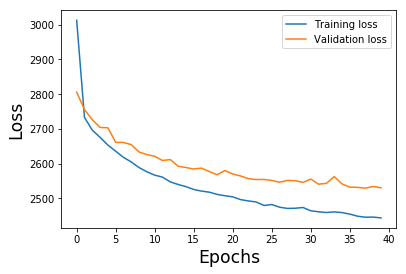

In [33]:
# Train VAE on new compendium data
train_vae_modules.train_vae(config_file,
                   normalized_data_file)